1. goal_set.p: 코드에 사용된 목표 세트입니다. goal_set에는 goal_set["train"] 및 goal_set["test"]를 통해 방문할 수 있는 훈련 세트와 테스트 세트가 포함되어 있습니다. 각 하위 집합은 논문에 설명된 사용자 목표 목록이며 각 사용자 목표는 세 개의 키가 있는 사전입니다. "consult_id"는 사용자 ID, "group_id"는 사용자 목표가 속한 그룹, "disease_tag" 는 사용자가 앓고 있는 질병이고 "목표"는 슬롯(요청 슬롯, 암시적 증상 및 명시적 증상)의 조합입니다.  
  
2. action_set.p: 이 의료 DS에 대해 사전 정의된 작업 유형입니다.

3. disease_symptom.p: 질병별 증상 모음.

4. Slot_set.p: 우리 논문에서 설명한 바와 같이 정규화된 증상과 특수 슬롯 질병으로 구성된 슬롯 세트입니다.

이제 목표 세트에는 30,000개의 사용자 목표와 총 90개의 질병이 포함되며, 또한 9개의 질병 그룹이 포함되고 각 그룹에는 10개의 질병이 포함됩니다.

우리가 선택한 그룹 ID는 [1,4,5,6,7,12,13,14,19] 중 하나이며 이는 ICD-10-CM의 장 번호에 해당합니다.

label1부터 label19까지의 폴더는 각 작업자에 대한 하위 수준 정책 교육에 사용됩니다.

각 폴더에는 이 그룹의 질병에만 해당하는 자체 "goal_set.p", "action_set.p", "disease_symptom.p" 및 "slot_set.p"가 포함되어 있습니다.

자세한 내용은 우리의 논문을 참조하세요.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
import pickle

goal_set = pickle.load(open('synthetic_dataset/goal_set.p', 'rb'))
action_set = pickle.load(open('synthetic_dataset/action_set.p', 'rb'))
disease_symptom = pickle.load(open('synthetic_dataset/disease_symptom.p', 'rb'))
slot_set = pickle.load(open('synthetic_dataset/slot_set.p', 'rb'))

In [5]:
train_data = goal_set['train']
test_data = goal_set['test']

In [6]:
train_data

[{'consult_id': 1059,
  'disease_tag': 'Central retinal artery or vein occlusion',
  'group_id': '7',
  'goal': {'request_slots': {'disease': 'UNK'},
   'explicit_inform_slots': {'Spots or clouds in vision': True},
   'implicit_inform_slots': {'Diminished vision': True,
    'Symptoms of eye': True,
    'Pain in eye': True}}},
 {'consult_id': 19510,
  'disease_tag': 'Degenerative disc disease',
  'group_id': '6',
  'goal': {'request_slots': {'disease': 'UNK'},
   'explicit_inform_slots': {'Shoulder pain': True},
   'implicit_inform_slots': {'Back pain': True,
    'Low back pain': True,
    'Neck pain': True,
    'Hip pain': True,
    'Ache all over': True}}},
 {'consult_id': 25630,
  'disease_tag': 'Diabetic retinopathy',
  'group_id': '4',
  'goal': {'request_slots': {'disease': 'UNK'},
   'explicit_inform_slots': {'Foreign body sensation in eye': True},
   'implicit_inform_slots': {}}},
 {'consult_id': 1467,
  'disease_tag': 'Chronic back pain',
  'group_id': '13',
  'goal': {'request

In [7]:
train_df = pd.DataFrame(train_data)

In [8]:
data = train_data + test_data

In [9]:
data

[{'consult_id': 1059,
  'disease_tag': 'Central retinal artery or vein occlusion',
  'group_id': '7',
  'goal': {'request_slots': {'disease': 'UNK'},
   'explicit_inform_slots': {'Spots or clouds in vision': True},
   'implicit_inform_slots': {'Diminished vision': True,
    'Symptoms of eye': True,
    'Pain in eye': True}}},
 {'consult_id': 19510,
  'disease_tag': 'Degenerative disc disease',
  'group_id': '6',
  'goal': {'request_slots': {'disease': 'UNK'},
   'explicit_inform_slots': {'Shoulder pain': True},
   'implicit_inform_slots': {'Back pain': True,
    'Low back pain': True,
    'Neck pain': True,
    'Hip pain': True,
    'Ache all over': True}}},
 {'consult_id': 25630,
  'disease_tag': 'Diabetic retinopathy',
  'group_id': '4',
  'goal': {'request_slots': {'disease': 'UNK'},
   'explicit_inform_slots': {'Foreign body sensation in eye': True},
   'implicit_inform_slots': {}}},
 {'consult_id': 1467,
  'disease_tag': 'Chronic back pain',
  'group_id': '13',
  'goal': {'request

In [10]:
# goal_set 파일로부터 disease_symptom 이 나온건지 궁금해서 봄 

from collections import defaultdict

# 'Degenerative disc disease'에 해당하는 증상
#degenerative_disc_disease_symptoms = ['Diminished vision', 'Blindness', 'Spots or clouds in vision', 'Symptoms of eye',
 #                                    'Pain in eye', 'Foreign body sensation in eye', 'Elbow pain', 'Irregular heartbeat',
  #                                   'Eye deviation', 'Double vision']

# 증상별 출현 빈도 저장할 딕셔너리
symptom_counts = defaultdict(int)

cnt = 0

# 데이터에서 'Degenerative disc disease'에 해당하는 증상의 출현 빈도 계산
for record in train_data:
    disease_tag = record.get('disease_tag', '')
    if disease_tag == 'Central retinal artery or vein occlusion':
        cnt += 1
        goal = record.get('goal', {})
        for symptom, is_present in {**goal.get('explicit_inform_slots', {}), **goal.get('implicit_inform_slots', {})}.items():
            if is_present:
                symptom_counts[symptom] += 1
              
        #if 'Elbow pain' not in {**goal.get('explicit_inform_slots', {}), **goal.get('implicit_inform_slots', {})} and \
        #if   'Irregular heartbeat' not in {**goal.get('explicit_inform_slots', {}), **goal.get('implicit_inform_slots', {})}:
         #   for symptom, is_present in {**goal.get('explicit_inform_slots', {}), **goal.get('implicit_inform_slots', {})}.items():
          #      if is_present:
           #         symptom_counts[symptom] += 1
            
            
print(cnt)
                    
# 증상별 출현 확률 계산
total_records = sum(symptom_counts.values())
probabilities = {symptom: count / cnt for symptom, count in symptom_counts.items()}

print("Degenerative disc disease 증상별 출현 빈도:", symptom_counts)

print("Degenerative disc disease 증상별 출현 확률:")
for symptom, prob in probabilities.items():
    print(f"{symptom}: {prob:.2f}")
    


288
Degenerative disc disease 증상별 출현 빈도: defaultdict(<class 'int'>, {'Spots or clouds in vision': 90, 'Diminished vision': 250, 'Symptoms of eye': 91, 'Pain in eye': 70, 'Blindness': 125, 'Elbow pain': 24, 'Double vision': 25, 'Foreign body sensation in eye': 39, 'Irregular heartbeat': 27, 'Eye deviation': 22})
Degenerative disc disease 증상별 출현 확률:
Spots or clouds in vision: 0.31
Diminished vision: 0.87
Symptoms of eye: 0.32
Pain in eye: 0.24
Blindness: 0.43
Elbow pain: 0.08
Double vision: 0.09
Foreign body sensation in eye: 0.14
Irregular heartbeat: 0.09
Eye deviation: 0.08


In [11]:
for record in train_data:
    disease_tag = record.get('disease_tag', '')
    if disease_tag == 'Central retinal artery or vein occlusion':
        goal = record.get('goal', {})
        #for symptom, is_present in {**goal.get('explicit_inform_slots', {}), **goal.get('implicit_inform_slots', {})}.items():
         #   if is_present:
          #      symptom_counts[symptom] += 1
        combined_slots = {}
        combined_slots.update(goal.get('explicit_inform_slots', {}))
        combined_slots.update(goal.get('implicit_inform_slots', {}))

        if 'Elbow pain' in combined_slots:
            print(goal)

{'request_slots': {'disease': 'UNK'}, 'explicit_inform_slots': {'Elbow pain': True}, 'implicit_inform_slots': {'Spots or clouds in vision': True, 'Symptoms of eye': True}}
{'request_slots': {'disease': 'UNK'}, 'explicit_inform_slots': {'Elbow pain': True}, 'implicit_inform_slots': {'Diminished vision': True, 'Spots or clouds in vision': True, 'Symptoms of eye': True}}
{'request_slots': {'disease': 'UNK'}, 'explicit_inform_slots': {'Diminished vision': True}, 'implicit_inform_slots': {'Elbow pain': True}}
{'request_slots': {'disease': 'UNK'}, 'explicit_inform_slots': {'Irregular heartbeat': True}, 'implicit_inform_slots': {'Diminished vision': True, 'Pain in eye': True, 'Foreign body sensation in eye': True, 'Elbow pain': True}}
{'request_slots': {'disease': 'UNK'}, 'explicit_inform_slots': {'Pain in eye': True}, 'implicit_inform_slots': {'Diminished vision': True, 'Elbow pain': True}}
{'request_slots': {'disease': 'UNK'}, 'explicit_inform_slots': {'Diminished vision': True}, 'implicit_

### 데이터 분석
- 이상치 제거 필요 가능성 – 눈 질병에 팔꿈치 통증 같은 것들 그냥 두고 해야 하나
- 결측치 확인 – consult_id, group_id, disease_tag, goal 결측치 없음을 확인 
- 데이터 수: 30000개, train데이터24000개, test데이터 6000개 합쳐서 분석함
- (피처 수) 
- (전처리)
- ...


In [12]:
df = pd.DataFrame(data)

In [13]:
df.shape

(30000, 4)

In [14]:
df.info

<bound method DataFrame.info of        consult_id                               disease_tag group_id  \
0            1059  Central retinal artery or vein occlusion        7   
1           19510                 Degenerative disc disease        6   
2           25630                      Diabetic retinopathy        4   
3            1467                         Chronic back pain       13   
4            5780                              Air embolism       19   
...           ...                                       ...      ...   
29995       29974                       Conversion disorder        5   
29996       29984                                 Flat feet       13   
29997       29993                         Alzheimer disease        6   
29998       29994                         Chronic back pain       13   
29999       29996                              Fibromyalgia       13   

                                                    goal  
0      {'request_slots': {'disease': 'UNK'},

In [15]:
df.columns

Index(['consult_id', 'disease_tag', 'group_id', 'goal'], dtype='object')

In [16]:
df.dtypes

consult_id      int64
disease_tag    object
group_id       object
goal           object
dtype: object

In [17]:
df['disease_tag'].nunique()  # 질병 90가지

90

In [18]:
train_df['group_id'].nunique()  # group_id 9개 

9

In [19]:
# 출력 너비 설정
pd.set_option('display.max_colwidth', None)

df.head()

consult_id                               disease_tag group_id  \
0        1059  Central retinal artery or vein occlusion        7   
1       19510                 Degenerative disc disease        6   
2       25630                      Diabetic retinopathy        4   
3        1467                         Chronic back pain       13   
4        5780                              Air embolism       19   

                                                                                                                                                                                                                                                                                                                                                                                         goal  
0                                                                                                                                                                                     {'request_slots': {'disease': 'UNK'}, 'explicit_inform_slots': {'Spots or clouds in vision': True}, 'implicit_inform_slots': {'Diminished vision': True, 'Symptoms of eye': True, 'Pain in eye': True}}  
1                                                                                                                                                                    {'request_slots': {'disease': 'UNK'}, 'explicit_inform_slots': {'Shoulder pain': True}, 'implicit_inform_slots': {'Back pain': True, 'Low back pain': True, 'Neck pain': True, 'Hip pain': True, 'Ache all over': True}}  
2                                                                                                                                                                                                                                                        {'request_slots': {'disease': 'UNK'}, 'explicit_inform_slots': {'Foreign body sensation in eye': True}, 'implicit_inform_slots': {}}  
3                                                                                                                                                                                                                                    {'request_slots': {'disease': 'UNK'}, 'explicit_inform_slots': {'Low back pain': True}, 'implicit_inform_slots': {'Back pain': True, 'Side pain': True}}  
4  {'request_slots': {'disease': 'UNK'}, 'explicit_inform_slots': {'Wrist pain': True}, 'implicit_inform_slots': {'Pain in eye': True, 'Shoulder cramps or spasms': True, 'Facial pain': True, 'Ankle pain': True, 'Pain during pregnancy': True, 'Joint stiffness or tightness': True, 'Pain or soreness of breast': True, 'Knee lump or mass': True, 'Excessive urination at night': True}}

In [20]:
df['consult_id'].nunique()  # consult_id 중복값 x

30000

In [21]:
disease_counts = df['disease_tag'].value_counts()    # disease_counts는 series타입 
disease_counts.head()    

Guillain Barre syndrome      377
Gonorrhea                    374
Epidural hemorrhage          372
Flat feet                    371
Carbon monoxide poisoning    370
Name: disease_tag, dtype: int64

In [22]:
#disease_counts.index              # series타입의 index와 값 출력
#disease_counts.value_counts()     # 각 질병마다 데이터 수는 균일한편.

In [23]:
group_id_counts = df['group_id'].value_counts()
group_id_counts

19    3389
6     3380
1     3371
5     3355
4     3348
12    3303
13    3294
7     3286
14    3274
Name: group_id, dtype: int64

In [24]:
# 특정 증상이 포함된 질병들 출력하기 
# df 의 goal 속성에서 증상만 떼와서 데이터프레임 다루기쉽게 다시 만들기

In [25]:
# 'goal' 속성 업데이트
def update_goal(row):
    new_goal = {}
    
    # 'explicit_inform_slots'에서 증상 추출
    explicit_symptoms = {k: v for k, v in row['goal']['explicit_inform_slots'].items() if v}
    new_goal.update(explicit_symptoms)
    
    # 'implicit_inform_slots'가 있는 경우 증상 추출
    if 'implicit_inform_slots' in row['goal']:
        implicit_symptoms = {k: v for k, v in row['goal']['implicit_inform_slots'].items() if v}
        new_goal.update(implicit_symptoms)
    
    return new_goal

# 'goal' 속성 업데이트 적용
df['goal'] = df.apply(update_goal, axis=1)
df2 = df
df2.head()

consult_id                               disease_tag group_id  \
0        1059  Central retinal artery or vein occlusion        7   
1       19510                 Degenerative disc disease        6   
2       25630                      Diabetic retinopathy        4   
3        1467                         Chronic back pain       13   
4        5780                              Air embolism       19   

                                                                                                                                                                                                                                                                                              goal  
0                                                                                                                                                                                     {'Spots or clouds in vision': True, 'Diminished vision': True, 'Symptoms of eye': True, 'Pain in eye': True}  
1                                                                                                                                                                    {'Shoulder pain': True, 'Back pain': True, 'Low back pain': True, 'Neck pain': True, 'Hip pain': True, 'Ache all over': True}  
2                                                                                                                                                                                                                                                          {'Foreign body sensation in eye': True}  
3                                                                                                                                                                                                                                    {'Low back pain': True, 'Back pain': True, 'Side pain': True}  
4  {'Wrist pain': True, 'Pain in eye': True, 'Shoulder cramps or spasms': True, 'Facial pain': True, 'Ankle pain': True, 'Pain during pregnancy': True, 'Joint stiffness or tightness': True, 'Pain or soreness of breast': True, 'Knee lump or mass': True, 'Excessive urination at night': True}

boolean masks, (series(?))

In [26]:
# 질병하나골라서 각 증상 분포 -> 제일 높게나온 증상과 낮게나온증상이 포함되어 있는 질병들 출력해보기 
# 많이 나온 증상이 소수의 질병에 분포되었는지 확인해보고 싶음 

In [27]:
# 특정 열의 값 변경 
# df.loc[mask, 'B'] = 0  # mkst 해당하는 행의 'B'열 값을 0으로 변경

# 여러 조건 조합
# combined_mask = (df['A'] > 2) & (df['B'] < 8)  # 'A'열의 값이 2보다 크고 'B'열의 값이 8보다 작은 행
# filtered_df = df[combined_mask]

In [28]:
# 조건에 따른 boolean mask 생성
mask = df['disease_tag'] == 'Central retinal artery or vein occlusion'
# 조건을 만족하는 행만 선택
filtered_df = df[mask]

filtered_df

In [29]:
filtered_df.head()

consult_id                               disease_tag group_id  \
0          1059  Central retinal artery or vein occlusion        7   
29        22535  Central retinal artery or vein occlusion        7   
322       10308  Central retinal artery or vein occlusion        7   
449       12491  Central retinal artery or vein occlusion        7   
479       23129  Central retinal artery or vein occlusion        7   

                                                                                                             goal  
0    {'Spots or clouds in vision': True, 'Diminished vision': True, 'Symptoms of eye': True, 'Pain in eye': True}  
29                                        {'Blindness': True, 'Diminished vision': True, 'Symptoms of eye': True}  
322                                                                      {'Pain in eye': True, 'Blindness': True}  
449                              {'Elbow pain': True, 'Spots or clouds in vision': True, 'Symptoms of eye': True}  
479   {'Elbow pain': True, 'Diminished vision': True, 'Spots or clouds in vision': True, 'Symptoms of eye': True}

In [30]:
# 'goal' 열의 딕셔너리를 풀어서 새로운 데이터프레임 생성
goal_data = filtered_df['goal'].apply(pd.Series)
goal_data

Spots or clouds in vision Diminished vision Symptoms of eye Pain in eye  \
0                          True              True            True        True   
29                          NaN              True            True         NaN   
322                         NaN               NaN             NaN        True   
449                        True               NaN            True         NaN   
479                        True              True            True         NaN   
...                         ...               ...             ...         ...   
29565                       NaN               NaN             NaN        True   
29567                       NaN              True             NaN         NaN   
29632                       NaN              True            True        True   
29741                       NaN               NaN             NaN        True   
29956                       NaN              True             NaN         NaN   

      Blindness Elbow pain Double vision Foreign body sensation in eye  \
0           NaN        NaN           NaN                           NaN   
29         True        NaN           NaN                           NaN   
322        True        NaN           NaN                           NaN   
449         NaN       True           NaN                           NaN   
479         NaN       True           NaN                           NaN   
...         ...        ...           ...                           ...   
29565       NaN        NaN           NaN                           NaN   
29567       NaN        NaN           NaN                           NaN   
29632       NaN        NaN           NaN                           NaN   
29741       NaN        NaN           NaN                           NaN   
29956       NaN        NaN           NaN                           NaN   

      Irregular heartbeat Eye deviation  
0                     NaN           NaN  
29                    NaN           NaN  
322                   NaN           NaN  
449                   NaN           NaN  
479                   NaN           NaN  
...                   ...           ...  
29565                 NaN           NaN  
29567                True           NaN  
29632                 NaN           NaN  
29741                 NaN           NaN  
29956                 NaN           NaN  

[352 rows x 10 columns]

In [31]:
# 각 열에서 True의 개수 세기
true_counts_by_column = goal_data.apply(lambda x: x.sum(), axis=0)

# 내림차순으로 정렬하여 출력
true_counts_sorted = true_counts_by_column.sort_values(ascending=False)

print(true_counts_sorted)

Diminished vision                304
Blindness                        150
Symptoms of eye                  112
Spots or clouds in vision        101
Pain in eye                       83
Foreign body sensation in eye     44
Irregular heartbeat               36
Eye deviation                     30
Double vision                     27
Elbow pain                        27
dtype: int64


In [32]:
# 'Diminished vision'이 포함된 질병들 출력

diseases_with_diminished_vision = df[df['goal'].apply(lambda x: 'Diminished vision' in x)]
#' '.join(diseases)
print(diseases_with_diminished_vision['disease_tag'].unique())

['Central retinal artery or vein occlusion'
 'Conjunctivitis due to allergy' 'Corneal disorder' 'Cerebral edema'
 'Corneal abrasion' 'Diabetic retinopathy' 'Cyst of the eyelid'
 'Acute glaucoma' 'Aphakia' 'Endophthalmitis' 'Chalazion' 'Ectropion']


df

In [33]:
# 'goal' 열의 딕셔너리를 풀어서 새로운 데이터프레임 생성
#30000개 행 
symptom_df = df['goal'].apply(pd.Series)
symptom_df.head()

Spots or clouds in vision Diminished vision Symptoms of eye Pain in eye  \
0                      True              True            True        True   
1                       NaN               NaN             NaN         NaN   
2                       NaN               NaN             NaN         NaN   
3                       NaN               NaN             NaN         NaN   
4                       NaN               NaN             NaN        True   

  Shoulder pain Back pain Low back pain Neck pain Hip pain Ache all over  ...  \
0           NaN       NaN           NaN       NaN      NaN           NaN  ...   
1          True      True          True      True     True          True  ...   
2           NaN       NaN           NaN       NaN      NaN           NaN  ...   
3           NaN      True          True       NaN      NaN           NaN  ...   
4           NaN       NaN           NaN       NaN      NaN           NaN  ...   

  Irregular belly button Back cramps or spasms Unusual color or odor to urine  \
0                    NaN                   NaN                            NaN   
1                    NaN                   NaN                            NaN   
2                    NaN                   NaN                            NaN   
3                    NaN                   NaN                            NaN   
4                    NaN                   NaN                            NaN   

  Itching of scrotum Back mass or lump Hand or finger cramps or spasms  \
0                NaN               NaN                             NaN   
1                NaN               NaN                             NaN   
2                NaN               NaN                             NaN   
3                NaN               NaN                             NaN   
4                NaN               NaN                             NaN   

  Bowlegged or knock-kneed Feeling cold Nose deformity Pus in urine  
0                      NaN          NaN            NaN          NaN  
1                      NaN          NaN            NaN          NaN  
2                      NaN          NaN            NaN          NaN  
3                      NaN          NaN            NaN          NaN  
4                      NaN          NaN            NaN          NaN  

[5 rows x 266 columns]

In [71]:
"""이 코드는 각 증상 쌍에 대한 포인트 비스리얼 상관계수를 계산하고 출력합니다. 
상관계수는 -1과 1 사이의 값으로, 1에 가까울수록 두 증상 간의 양의 상관관계가 있음을 의미하고, 
-1에 가까울수록 음의 상관관계가 있음을 의미합니다. 0은 상관관계가 없음을 의미합니다.
수치형 데이터 아니라서 의미없다
"""

"""
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr

# NaN 값을 0으로 채우기
df_filled = symptom_df.fillna(False)

# 증상간의 상관관계 계산을 위한 딕셔너리 초기화
correlations = {}

# 각 증상 쌍에 대해 상관관계 계산
for symptom1 in df_filled.columns:
    for symptom2 in df_filled.columns:
        if symptom1 != symptom2:
            correlation, _ = pointbiserialr(df_filled[symptom1], df_filled[symptom2])
            correlations[(symptom1, symptom2)] = correlation

# 상관관계를 내림차순으로 정렬
correlations_sorted = {k: v for k, v in sorted(correlations.items(), key=lambda item: item[1], reverse=True)}

# 결과 출력
for (symptom1, symptom2), correlation in correlations_sorted.items():
    print(f"{symptom1} 와 {symptom2} 간의 상관계수: {correlation}")
"""

Neck swelling 와 Groin mass 간의 상관계수: 0.6731704952174584
Groin mass 와 Neck swelling 간의 상관계수: 0.6731704952174584
Neck swelling 와 Arm swelling 간의 상관계수: 0.6654189664428504
Arm swelling 와 Neck swelling 간의 상관계수: 0.6654189664428504
Arm lump or mass 와 Neck swelling 간의 상관계수: 0.6602675823656443
Neck swelling 와 Arm lump or mass 간의 상관계수: 0.6602675823656443
Shoulder cramps or spasms 와 Pain during pregnancy 간의 상관계수: 0.6380001280112639
Pain during pregnancy 와 Shoulder cramps or spasms 간의 상관계수: 0.6380001280112639
Shoulder cramps or spasms 와 Joint stiffness or tightness 간의 상관계수: 0.6340262575945371
Joint stiffness or tightness 와 Shoulder cramps or spasms 간의 상관계수: 0.6340262575945371
Pain during pregnancy 와 Joint stiffness or tightness 간의 상관계수: 0.6336134026640694
Joint stiffness or tightness 와 Pain during pregnancy 간의 상관계수: 0.6336134026640694
Shoulder cramps or spasms 와 Excessive urination at night 간의 상관계수: 0.6301339748752315
Excessive urination at night 와 Shoulder cramps or spasms 간의 상관계수: 0.6301339748752

Pulling at ears 와 Suprapubic pain 간의 상관계수: 0.05739807897397565
Itching of skin 와 Throat swelling 간의 상관계수: 0.057301221953719804
Throat swelling 와 Itching of skin 간의 상관계수: 0.057301221953719804
Loss of sensation 와 Foot or toe pain 간의 상관계수: 0.057158373558072684
Foot or toe pain 와 Loss of sensation 간의 상관계수: 0.057158373558072684
Sharp abdominal pain 와 Leg swelling 간의 상관계수: 0.05714898753266166
Leg swelling 와 Sharp abdominal pain 간의 상관계수: 0.05714898753266166
Skin rash 와 Difficulty in swallowing 간의 상관계수: 0.0570279636990828
Difficulty in swallowing 와 Skin rash 간의 상관계수: 0.0570279636990828
Neck pain 와 Difficulty speaking 간의 상관계수: 0.056984835316570934
Difficulty speaking 와 Neck pain 간의 상관계수: 0.056984835316570934
Spots or clouds in vision 와 Eyelid lesion or rash 간의 상관계수: 0.05690513695803212
Eyelid lesion or rash 와 Spots or clouds in vision 간의 상관계수: 0.05690513695803212
Cough 와 Emotional symptoms 간의 상관계수: 0.056843617868112414
Emotional symptoms 와 Cough 간의 상관계수: 0.056843617868112414
Sharp abdominal pai

Delusions or hallucinations 와 Vomiting 간의 상관계수: 0.016798671146534633
Skin rash 와 Emotional symptoms 간의 상관계수: 0.01671945332749272
Emotional symptoms 와 Skin rash 간의 상관계수: 0.01671945332749272
Muscle pain 와 Hemoptysis 간의 상관계수: 0.016705223444824564
Hemoptysis 와 Muscle pain 간의 상관계수: 0.016705223444824564
Back pain 와 Paresthesia 간의 상관계수: 0.016673714104566324
Paresthesia 와 Back pain 간의 상관계수: 0.016673714104566324
Cramps and spasms 와 Painful urination 간의 상관계수: 0.016633922512503948
Painful urination 와 Cramps and spasms 간의 상관계수: 0.016633922512503948
Retention of urine 와 Symptoms of the kidneys 간의 상관계수: 0.01662975590263086
Symptoms of the kidneys 와 Retention of urine 간의 상관계수: 0.01662975590263086
Disturbance of memory 와 Wrist weakness 간의 상관계수: 0.016538137958184818
Wrist weakness 와 Disturbance of memory 간의 상관계수: 0.016538137958184818
Difficulty speaking 와 Arm pain 간의 상관계수: 0.016537967377057577
Arm pain 와 Difficulty speaking 간의 상관계수: 0.016537967377057577
Ankle stiffness or tightness 와 Shoulder swelling 

Vomiting blood 와 Disturbance of smell or taste 간의 상관계수: -0.0004231641818259267
Hysterical behavior 와 Poor circulation 간의 상관계수: -0.0004231641818259268
Poor circulation 와 Hysterical behavior 간의 상관계수: -0.0004231641818259268
Vomiting blood 와 Itching of scrotum 간의 상관계수: -0.0004231641818259269
Itching of scrotum 와 Vomiting blood 간의 상관계수: -0.0004231641818259269
Disturbance of smell or taste 와 Drainage in throat 간의 상관계수: -0.000423164181825927
Drainage in throat 와 Disturbance of smell or taste 간의 상관계수: -0.000423164181825927
Frequent menstruation 와 Drainage in throat 간의 상관계수: -0.00042316418182592705
Drainage in throat 와 Frequent menstruation 간의 상관계수: -0.00042316418182592705
Frequent menstruation 와 Infant spitting up 간의 상관계수: -0.0004231641818259271
Infant spitting up 와 Frequent menstruation 간의 상관계수: -0.0004231641818259271
Poor circulation 와 Frequent menstruation 간의 상관계수: -0.0004231641818259272
Poor circulation 와 Disturbance of smell or taste 간의 상관계수: -0.0004231641818259272
Frequent menstruation 와

Intermenstrual bleeding 와 Pus in sputum 간의 상관계수: -0.0007660383532123982
Pus in sputum 와 Intermenstrual bleeding 간의 상관계수: -0.0007660383532123982
Intermenstrual bleeding 와 Back stiffness or tightness 간의 상관계수: -0.0007660383532123994
Back stiffness or tightness 와 Intermenstrual bleeding 간의 상관계수: -0.0007660383532123994
Intermenstrual bleeding 와 Incontinence of stool 간의 상관계수: -0.0007660383532124001
Incontinence of stool 와 Intermenstrual bleeding 간의 상관계수: -0.0007660383532124001
Polyuria 와 Unusual color or odor to urine 간의 상관계수: -0.0007665677473263784
Unusual color or odor to urine 와 Polyuria 간의 상관계수: -0.0007665677473263784
Polyuria 와 Diaper rash 간의 상관계수: -0.0007665677473263806
Diaper rash 와 Polyuria 간의 상관계수: -0.0007665677473263806
Wrist stiffness or tightness 와 Arm weakness 간의 상관계수: -0.0007666957496143728
Arm weakness 와 Wrist stiffness or tightness 간의 상관계수: -0.0007666957496143728
Wrist stiffness or tightness 와 Back cramps or spasms 간의 상관계수: -0.0007666957496143737
Back cramps or spasms 와 Wrist

Diaper rash 와 Knee stiffness or tightness 간의 상관계수: -0.001016690581896342
Arm stiffness or tightness 와 Unusual color or odor to urine 간의 상관계수: -0.0010166905818963427
Unusual color or odor to urine 와 Arm stiffness or tightness 간의 상관계수: -0.0010166905818963427
Nailbiting 와 Bladder mass 간의 상관계수: -0.0010175409839802676
Bladder mass 와 Nailbiting 간의 상관계수: -0.0010175409839802676
Loss of sex drive 와 Bladder mass 간의 상관계수: -0.0010175409839802683
Bladder mass 와 Loss of sex drive 간의 상관계수: -0.0010175409839802683
Nailbiting 와 Back mass or lump 간의 상관계수: -0.0010175409839802696
Back mass or lump 와 Nailbiting 간의 상관계수: -0.0010175409839802696
Loss of sex drive 와 Back mass or lump 간의 상관계수: -0.0010175409839802711
Back mass or lump 와 Loss of sex drive 간의 상관계수: -0.0010175409839802711
Itchy scalp 와 Mass in scrotum 간의 상관계수: -0.0010175645695856802
Mass in scrotum 와 Itchy scalp 간의 상관계수: -0.0010175645695856802
Mass in scrotum 와 Eye deviation 간의 상관계수: -0.0010175645695856806
Eye deviation 와 Mass in scrotum 간의 상관계수: -0

Hysterical behavior 와 Foot or toe swelling 간의 상관계수: -0.001330989697397391
Dry or flaky scalp 와 Eye deviation 간의 상관계수: -0.0013310014524280803
Eye deviation 와 Dry or flaky scalp 간의 상관계수: -0.0013310014524280803
Itchy scalp 와 Dry or flaky scalp 간의 상관계수: -0.001331001452428081
Dry or flaky scalp 와 Itchy scalp 간의 상관계수: -0.001331001452428081
Ankle pain 와 Wrist swelling 간의 상관계수: -0.0013314494585235127
Wrist swelling 와 Ankle pain 간의 상관계수: -0.0013314494585235127
Excessive appetite 와 Irregular belly button 간의 상관계수: -0.0013326592589927666
Irregular belly button 와 Excessive appetite 간의 상관계수: -0.0013326592589927666
Excessive appetite 와 Scanty menstrual flow 간의 상관계수: -0.001332659258992769
Scanty menstrual flow 와 Excessive appetite 간의 상관계수: -0.001332659258992769
Excessive appetite 와 Nose deformity 간의 상관계수: -0.001332659258992771
Nose deformity 와 Excessive appetite 간의 상관계수: -0.001332659258992771
Apnea 와 Foot or toe stiffness or tightness 간의 상관계수: -0.0013334435513982319
Foot or toe stiffness or tightness 

Arm swelling 와 Nightmares 간의 상관계수: -0.001608595259620791
Nightmares 와 Arm swelling 간의 상관계수: -0.001608595259620791
Arm swelling 와 Too little hair 간의 상관계수: -0.0016085952596207912
Too little hair 와 Arm swelling 간의 상관계수: -0.0016085952596207912
Excessive growth 와 Increased heart rate 간의 상관계수: -0.0016086364204155362
Increased heart rate 와 Excessive growth 간의 상관계수: -0.0016086364204155362
Excessive growth 와 Bleeding gums 간의 상관계수: -0.0016086364204155375
Bleeding gums 와 Excessive growth 간의 상관계수: -0.0016086364204155375
Restlessness 와 Infant spitting up 간의 상관계수: -0.0016099121920286287
Infant spitting up 와 Restlessness 간의 상관계수: -0.0016099121920286287
Irregular heartbeat 와 Drainage in throat 간의 상관계수: -0.0016099121920286291
Drainage in throat 와 Irregular heartbeat 간의 상관계수: -0.0016099121920286291
Restlessness 와 Drainage in throat 간의 상관계수: -0.0016099121920286293
Restlessness 와 Vomiting blood 간의 상관계수: -0.0016099121920286293
Drainage in throat 와 Restlessness 간의 상관계수: -0.0016099121920286293
Vomiting blood

Back mass or lump 와 Pain in testicles 간의 상관계수: -0.0018937528030972832
Kidney mass 와 Wrist stiffness or tightness 간의 상관계수: -0.0018939564287994682
Wrist stiffness or tightness 와 Kidney mass 간의 상관계수: -0.0018939564287994682
Plugged feeling in ear 와 Bleeding from eye 간의 상관계수: -0.0018953204546354038
Bleeding from eye 와 Plugged feeling in ear 간의 상관계수: -0.0018953204546354038
Plugged feeling in ear 와 Swollen abdomen 간의 상관계수: -0.0018953204546354073
Swollen abdomen 와 Plugged feeling in ear 간의 상관계수: -0.0018953204546354073
Wrist lump or mass 와 Hoarse voice 간의 상관계수: -0.0018955144907189475
Hoarse voice 와 Wrist lump or mass 간의 상관계수: -0.0018955144907189475
Fever 와 Pus in urine 간의 상관계수: -0.001896127090996258
Pus in urine 와 Fever 간의 상관계수: -0.001896127090996258
Lymphedema 와 Mass in scrotum 간의 상관계수: -0.0018969454767028071
Mass in scrotum 와 Lymphedema 간의 상관계수: -0.0018969454767028071
Sweating 와 Muscle swelling 간의 상관계수: -0.0018983284948388614
Muscle swelling 와 Sweating 간의 상관계수: -0.0018983284948388614
Sweating

Itchy scalp 와 Congestion in chest 간의 상관계수: -0.0021818810542196337
Allergic reaction 와 Back weakness 간의 상관계수: -0.002181911789493615
Allergic reaction 와 Abnormal size or shape of ear 간의 상관계수: -0.002181911789493615
Back weakness 와 Allergic reaction 간의 상관계수: -0.002181911789493615
Abnormal size or shape of ear 와 Allergic reaction 간의 상관계수: -0.002181911789493615
Bones are painful 와 Muscle stiffness or tightness 간의 상관계수: -0.002181991042348016
Muscle stiffness or tightness 와 Bones are painful 간의 상관계수: -0.002181991042348016
Bones are painful 와 Eye strain 간의 상관계수: -0.0021819910423480165
Eye strain 와 Bones are painful 간의 상관계수: -0.0021819910423480165
Bones are painful 와 Emotional symptoms 간의 상관계수: -0.002181991042348017
Emotional symptoms 와 Bones are painful 간의 상관계수: -0.002181991042348017
Skin lesion 와 Pus in urine 간의 상관계수: -0.00218225164529384
Pus in urine 와 Skin lesion 간의 상관계수: -0.00218225164529384
Frequent urination 와 Hysterical behavior 간의 상관계수: -0.002182433534460007
Hysterical behavior 와 Freque

Skin growth 와 Back mass or lump 간의 상관계수: -0.0024778508191835025
Bladder mass 와 Skin growth 간의 상관계수: -0.0024778508191835025
Back mass or lump 와 Skin growth 간의 상관계수: -0.0024778508191835025
Burning abdominal pain 와 Thirst 간의 상관계수: -0.002478617999521501
Wrist weakness 와 Thirst 간의 상관계수: -0.002478617999521501
Thirst 와 Burning abdominal pain 간의 상관계수: -0.002478617999521501
Thirst 와 Wrist weakness 간의 상관계수: -0.002478617999521501
Hemoptysis 와 Sleepiness 간의 상관계수: -0.0024790510883479933
Sleepiness 와 Hemoptysis 간의 상관계수: -0.0024790510883479933
Sleepiness 와 Stiffness all over 간의 상관계수: -0.002479051088347997
Stiffness all over 와 Sleepiness 간의 상관계수: -0.002479051088347997
Sleepiness 와 Sneezing 간의 상관계수: -0.0024790510883479977
Sneezing 와 Sleepiness 간의 상관계수: -0.0024790510883479977
Throat swelling 와 Sleepiness 간의 상관계수: -0.0024790510883480003
Sleepiness 와 Throat swelling 간의 상관계수: -0.0024790510883480003
Knee weakness 와 Decreased heart rate 간의 상관계수: -0.002479282860790404
Unwanted hair 와 Decreased heart rate 간의 상

Skin pain 와 Itchy eyelid 간의 상관계수: -0.002810295720330854
Excessive urination at night 와 Back mass or lump 간의 상관계수: -0.002810769683521674
Back mass or lump 와 Excessive urination at night 간의 상관계수: -0.002810769683521674
Excessive urination at night 와 Bladder mass 간의 상관계수: -0.002810769683521676
Bladder mass 와 Excessive urination at night 간의 상관계수: -0.002810769683521676
Heavy menstrual flow 와 Itchy scalp 간의 상관계수: -0.0028112420712876466
Itchy scalp 와 Heavy menstrual flow 간의 상관계수: -0.0028112420712876466
Heavy menstrual flow 와 Eye deviation 간의 상관계수: -0.002811242071287648
Eye deviation 와 Heavy menstrual flow 간의 상관계수: -0.002811242071287648
Excessive growth 와 Knee stiffness or tightness 간의 상관계수: -0.0028124042635259312
Knee stiffness or tightness 와 Excessive growth 간의 상관계수: -0.0028124042635259312
Arm stiffness or tightness 와 Excessive growth 간의 상관계수: -0.002812404263525932
Excessive growth 와 Arm stiffness or tightness 간의 상관계수: -0.002812404263525932
Arm lump or mass 와 Apnea 간의 상관계수: -0.002812889986397

Excessive growth 와 Penis pain 간의 상관계수: -0.003220335554808228
Penis pain 와 Excessive growth 간의 상관계수: -0.003220335554808228
Excessive growth 와 Symptoms of prostate 간의 상관계수: -0.0032203355548082284
Symptoms of prostate 와 Excessive growth 간의 상관계수: -0.0032203355548082284
Wrist swelling 와 Thirst 간의 상관계수: -0.0032205636543962976
Thirst 와 Wrist swelling 간의 상관계수: -0.0032205636543962976
Vaginal itching 와 Wrist stiffness or tightness 간의 상관계수: -0.0032212707260611366
Wrist stiffness or tightness 와 Vaginal itching 간의 상관계수: -0.0032212707260611366
Nailbiting 와 Penis redness 간의 상관계수: -0.003221616416429806
Penis redness 와 Nailbiting 간의 상관계수: -0.003221616416429806
Loss of sex drive 와 Penis redness 간의 상관계수: -0.0032216164164298087
Penis redness 와 Loss of sex drive 간의 상관계수: -0.0032216164164298087
Loss of sex drive 와 Wrinkles on skin 간의 상관계수: -0.0032216164164298095
Wrinkles on skin 와 Loss of sex drive 간의 상관계수: -0.0032216164164298095
Nailbiting 와 Wrinkles on skin 간의 상관계수: -0.0032216164164298134
Wrinkles on skin

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Unwanted hair 와 Nausea 간의 상관계수: -0.008068773881617235
Nausea 와 Knee weakness 간의 상관계수: -0.008068773881617242
Knee weakness 와 Nausea 간의 상관계수: -0.008068773881617242
Diarrhea 와 White discharge from eye 간의 상관계수: -0.008070719814581932
White discharge from eye 와 Diarrhea 간의 상관계수: -0.008070719814581932
Pelvic pain 와 Skin irritation 간의 상관계수: -0.008072238308229156
Skin irritation 와 Pelvic pain 간의 상관계수: -0.008072238308229156
Arm swelling 와 Abnormal movement of eyelid 간의 상관계수: -0.008072562983052473
Abnormal movement of eyelid 와 Arm swelling 간의 상관계수: -0.008072562983052473
Wrist pain 와 Mass in scrotum 간의 상관계수: -0.008072660820134617
Mass in scrotum 와 Wrist pain 간의 상관계수: -0.008072660820134617
Low back pain 와 Hand or finger pain 간의 상관계수: -0.008073549154574878
Hand or finger pain 와 Low back pain 간의 상관계수: -0.008073549154574878
Spots or clouds in vision 와 Restlessness 간의 상관계수: -0.008074146697342658
Restlessness 와 Spots or clouds in vision 간의 상관계수: -0.008074146697342658
Wrist swelling 와 Lower abdominal pai

Arm pain 와 Feet turned in 간의 상관계수: -0.009407962181279636
Feet turned in 와 Arm pain 간의 상관계수: -0.009407962181279636
Nausea 와 Dry or flaky scalp 간의 상관계수: -0.009408376041463459
Dry or flaky scalp 와 Nausea 간의 상관계수: -0.009408376041463459
Ringing in ear 와 Seizures 간의 상관계수: -0.009408409683214542
Seizures 와 Ringing in ear 간의 상관계수: -0.009408409683214542
Skin growth 와 Difficulty breathing 간의 상관계수: -0.009411420241902783
Difficulty breathing 와 Skin growth 간의 상관계수: -0.009411420241902783
Unpredictable menstruation 와 Delusions or hallucinations 간의 상관계수: -0.009413684977497888
Delusions or hallucinations 와 Unpredictable menstruation 간의 상관계수: -0.009413684977497888
Shoulder cramps or spasms 와 Bleeding or discharge from nipple 간의 상관계수: -0.009416820292701883
Bleeding or discharge from nipple 와 Shoulder cramps or spasms 간의 상관계수: -0.009416820292701883
Painful urination 와 Skin irritation 간의 상관계수: -0.009417625677725583
Skin irritation 와 Painful urination 간의 상관계수: -0.009417625677725583
White discharge from eye 와

Painful sinuses 와 Shortness of breath 간의 상관계수: -0.010796445938022639
Foreign body sensation in eye 와 Hand or finger swelling 간의 상관계수: -0.010796445996609238
Hand or finger swelling 와 Foreign body sensation in eye 간의 상관계수: -0.010796445996609238
Ear pain 와 Seizures 간의 상관계수: -0.010797938845447927
Seizures 와 Ear pain 간의 상관계수: -0.010797938845447927
Abnormal movement of eyelid 와 Rib pain 간의 상관계수: -0.010798055590362947
Rib pain 와 Abnormal movement of eyelid 간의 상관계수: -0.010798055590362947
Allergic reaction 와 Excessive growth 간의 상관계수: -0.010798931186708043
Excessive growth 와 Allergic reaction 간의 상관계수: -0.010798931186708043
Pain in testicles 와 Suprapubic pain 간의 상관계수: -0.01079955292740043
Suprapubic pain 와 Pain in testicles 간의 상관계수: -0.01079955292740043
Leg weakness 와 Excessive appetite 간의 상관계수: -0.010799631896870315
Excessive appetite 와 Leg weakness 간의 상관계수: -0.010799631896870315
Itchiness of eye 와 Hand or finger lump or mass 간의 상관계수: -0.010804336757711187
Hand or finger lump or mass 와 Itchiness

Knee stiffness or tightness 와 Back pain 간의 상관계수: -0.012532374351124325
Paresthesia 와 Loss of sex drive 간의 상관계수: -0.012534301666710107
Loss of sex drive 와 Paresthesia 간의 상관계수: -0.012534301666710107
Dizziness 와 Skin pain 간의 상관계수: -0.01253554119604577
Skin pain 와 Dizziness 간의 상관계수: -0.01253554119604577
Dizziness 와 Symptoms of prostate 간의 상관계수: -0.012535541196045776
Dizziness 와 Penis pain 간의 상관계수: -0.012535541196045776
Symptoms of prostate 와 Dizziness 간의 상관계수: -0.012535541196045776
Penis pain 와 Dizziness 간의 상관계수: -0.012535541196045776
Knee lump or mass 와 Redness in ear 간의 상관계수: -0.012535609054633592
Redness in ear 와 Knee lump or mass 간의 상관계수: -0.012535609054633592
Redness in ear 와 Knee pain 간의 상관계수: -0.0125356090546336
Knee pain 와 Redness in ear 간의 상관계수: -0.0125356090546336
Excessive anger 와 Hand or finger lump or mass 간의 상관계수: -0.012536968197243991
Hand or finger lump or mass 와 Excessive anger 간의 상관계수: -0.012536968197243991
Excessive anger 와 Eyelid swelling 간의 상관계수: -0.012536968197243994


Shoulder stiffness or tightness 와 Cough 간의 상관계수: -0.014797608761644175
Vaginal pain 와 Involuntary urination 간의 상관계수: -0.014798371639715296
Involuntary urination 와 Vaginal pain 간의 상관계수: -0.014798371639715296
Skin dryness, peeling, scaliness, or roughness 와 Lower abdominal pain 간의 상관계수: -0.014802632416138538
Lower abdominal pain 와 Skin dryness, peeling, scaliness, or roughness 간의 상관계수: -0.014802632416138538
Wrist pain 와 Lymphedema 간의 상관계수: -0.01480410346809827
Lymphedema 와 Wrist pain 간의 상관계수: -0.01480410346809827
Headache 와 Feet turned in 간의 상관계수: -0.014807117611173832
Feet turned in 와 Headache 간의 상관계수: -0.014807117611173832
Shoulder cramps or spasms 와 Intermenstrual bleeding 간의 상관계수: -0.014809827823444968
Intermenstrual bleeding 와 Shoulder cramps or spasms 간의 상관계수: -0.014809827823444968
Facial pain 와 Hostile behavior 간의 상관계수: -0.014813959569462364
Hostile behavior 와 Facial pain 간의 상관계수: -0.014813959569462364
Itchiness of eye 와 Wrist swelling 간의 상관계수: -0.014821967722234885
Wrist swelling

Abnormal appearing skin 와 Elbow pain 간의 상관계수: -0.018493771253319632
Elbow pain 와 Abnormal appearing skin 간의 상관계수: -0.018493771253319632
Swollen eye 와 Rib pain 간의 상관계수: -0.018494199137352337
Rib pain 와 Swollen eye 간의 상관계수: -0.018494199137352337
Anxiety and nervousness 와 Leg swelling 간의 상관계수: -0.018495671791680775
Leg swelling 와 Anxiety and nervousness 간의 상관계수: -0.018495671791680775
Dizziness 와 Hostile behavior 간의 상관계수: -0.01849801240597647
Hostile behavior 와 Dizziness 간의 상관계수: -0.01849801240597647
Shoulder pain 와 Lower abdominal pain 간의 상관계수: -0.018499046120245288
Lower abdominal pain 와 Shoulder pain 간의 상관계수: -0.018499046120245288
Low back pain 와 Lump or mass of breast 간의 상관계수: -0.018508643608880968
Lump or mass of breast 와 Low back pain 간의 상관계수: -0.018508643608880968
Low back pain 와 Fluid retention 간의 상관계수: -0.01850864360888097
Fluid retention 와 Low back pain 간의 상관계수: -0.01850864360888097
Leg pain 와 Congestion in chest 간의 상관계수: -0.018509904717373828
Congestion in chest 와 Leg pain 간의 상관

Abusing alcohol 와 Lacrimation 간의 상관계수: -0.022381660008064387
Lacrimation 와 Abusing alcohol 간의 상관계수: -0.022381660008064387
Knee lump or mass 와 Leg weakness 간의 상관계수: -0.022392863911517104
Leg weakness 와 Knee lump or mass 간의 상관계수: -0.022392863911517104
Knee pain 와 Leg weakness 간의 상관계수: -0.022392863911517118
Leg weakness 와 Knee pain 간의 상관계수: -0.022392863911517118
Itchiness of eye 와 Vaginal discharge 간의 상관계수: -0.022395565668284805
Vaginal discharge 와 Itchiness of eye 간의 상관계수: -0.022395565668284805
Hand or finger pain 와 Sore throat 간의 상관계수: -0.02240350601894004
Sore throat 와 Hand or finger pain 간의 상관계수: -0.02240350601894004
Ankle pain 와 Abnormal movement of eyelid 간의 상관계수: -0.022407586258470946
Abnormal movement of eyelid 와 Ankle pain 간의 상관계수: -0.022407586258470946
Pelvic pain 와 Arm pain 간의 상관계수: -0.022409064353601175
Arm pain 와 Pelvic pain 간의 상관계수: -0.022409064353601175
Hip pain 와 Abusing alcohol 간의 상관계수: -0.02241035225233651
Abusing alcohol 와 Hip pain 간의 상관계수: -0.02241035225233651
Depressi

Spots or clouds in vision 와 Sharp chest pain 간의 상관계수: -0.029862111058696017
Sharp chest pain 와 Spots or clouds in vision 간의 상관계수: -0.029862111058696017
Pain in eye 와 Heavy menstrual flow 간의 상관계수: -0.029864480747890786
Heavy menstrual flow 와 Pain in eye 간의 상관계수: -0.029864480747890786
Depression 와 Difficulty in swallowing 간의 상관계수: -0.029884279131355912
Difficulty in swallowing 와 Depression 간의 상관계수: -0.029884279131355912
Diarrhea 와 Fatigue 간의 상관계수: -0.029886065400458066
Fatigue 와 Diarrhea 간의 상관계수: -0.029886065400458066
Back pain 와 Symptoms of the kidneys 간의 상관계수: -0.029891858197790524
Symptoms of the kidneys 와 Back pain 간의 상관계수: -0.029891858197790524
Foreign body sensation in eye 와 Anxiety and nervousness 간의 상관계수: -0.029903326331848903
Anxiety and nervousness 와 Foreign body sensation in eye 간의 상관계수: -0.029903326331848903
Abusing alcohol 와 Abnormal appearing skin 간의 상관계수: -0.029909122328495092
Abnormal appearing skin 와 Abusing alcohol 간의 상관계수: -0.029909122328495092
Loss of sensation 와 Diff

In [ ]:
#각 증상이 다른 증상과 함께 나타날 확률기반

import pandas as pd

# 'goal' 열을 활용하여 각 행에서 증상을 추출
symptoms = df2['goal'].apply(lambda x: list(x.keys()) if isinstance(x, dict) else [])

# 증상 리스트를 풀어서 Series로 변환
all_symptoms = pd.Series([item for sublist in symptoms for item in sublist])

# 증상 간의 확률 기반 상관관계 계산
correlations = {}
for symptom1 in all_symptoms.unique():
    for symptom2 in all_symptoms.unique():
        if symptom1 != symptom2:
            prob_symptom1_given_symptom2 = (symptoms.apply(lambda x: symptom1 in x and symptom2 in x).sum() / symptoms.apply(lambda x: symptom2 in x).sum())
            prob_symptom2_given_symptom1 = (symptoms.apply(lambda x: symptom2 in x and symptom1 in x).sum() / symptoms.apply(lambda x: symptom1 in x).sum())
            correlation = (prob_symptom1_given_symptom2 + prob_symptom2_given_symptom1) / 2
            correlations[(symptom1, symptom2)] = correlation

# 결과 출력
for (symptom1, symptom2), correlation in sorted(correlations.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{symptom1} 와 {symptom2} 간의 상관관계: {correlation}")

In [34]:
# 각 열에서 True의 개수 세기
true_counts_by_column = symptom_df.apply(lambda x: x.sum(), axis=0)

# 내림차순으로 정렬하여 출력
true_counts_sorted = true_counts_by_column.sort_values(ascending=False)

pd.set_option('display.max_rows', None)
print(true_counts_sorted)

Skin rash                                         3081
Pain in eye                                       3045
Back pain                                         2250
Depressive or psychotic symptoms                  2171
Diminished vision                                 2140
Headache                                          2103
Leg pain                                          2016
Skin lesion                                       2000
Fatigue                                           1800
Wrist pain                                        1778
Dizziness                                         1748
Sharp abdominal pain                              1713
Loss of sensation                                 1673
Depression                                        1669
Anxiety and nervousness                           1609
Itching of skin                                   1578
Fever                                             1535
Vomiting                                          1464
Nausea    

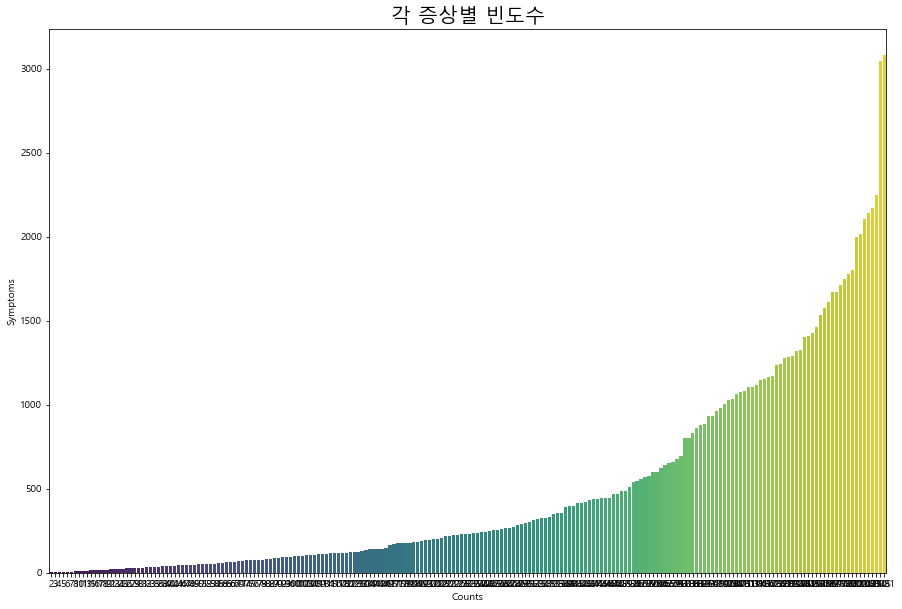

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 원하는 한글 폰트 경로로 변경하세요.
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 시각화 설정
plt.figure(figsize=(15, 10))
sns.barplot(x=true_counts_sorted, y=true_counts_sorted.values, palette='viridis')

# 라벨 및 제목 설정
plt.xlabel('Counts')
plt.ylabel('Symptoms')
plt.title('각 증상별 빈도수', fontsize=20)

# 그래프 표시
plt.show()

증상 별 빈도수는 차이가 있음. 

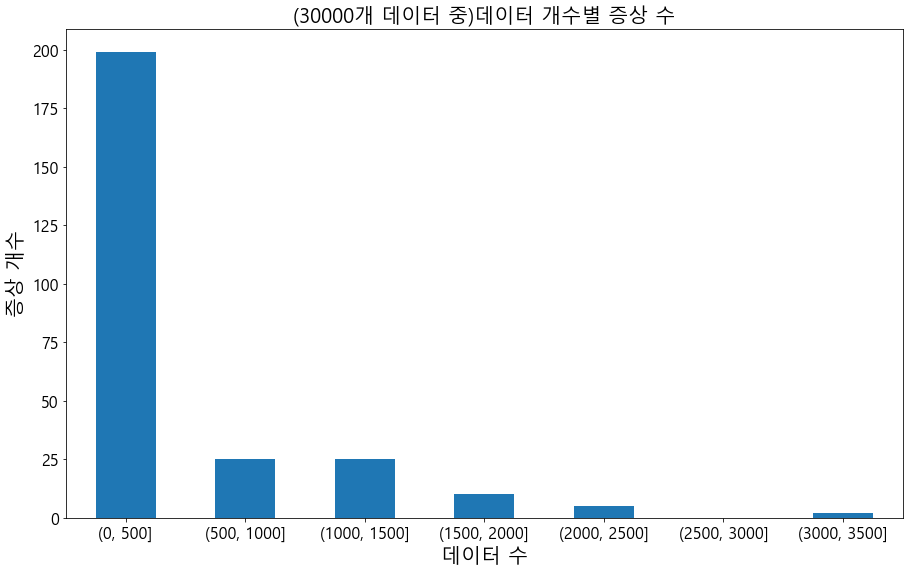

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용할 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

s = true_counts_sorted  # (series 타입)

# 데이터 정렬 및 그룹화
s_sorted = s.sort_values(ascending=False)
grouped_data = s_sorted.groupby(pd.cut(s_sorted, bins=[0, 500, 1000, 1500, 2000, 2500, 3000, 3500]))  
                                                    # bin은 구간.(bin=10하면 10개 구간으로 쪼갬)

# 그래프 그리기
grouped_data.size().plot(kind='bar', figsize=(15,9))
plt.title('(30000개 데이터 중)데이터 개수별 증상 수', fontsize=20)
plt.xlabel('데이터 수', fontsize=20)
plt.ylabel('증상 개수', fontsize=20)
plt.xticks(rotation=0, fontsize=16)  # x축 눈금 텍스트 가로로 표시
plt.yticks(rotation=0, fontsize=16)
plt.show()

In [43]:
disease_count = df2['disease_tag'].value_counts()
disease_count

Guillain Barre syndrome                     377
Gonorrhea                                   374
Epidural hemorrhage                         372
Flat feet                                   371
Carbon monoxide poisoning                   370
Corneal abrasion                            368
Acariasis                                   363
Alcohol intoxication                        362
Eczema                                      362
Anxiety                                     359
Diabetes insipidus                          358
Dissociative disorder                       358
Cystic Fibrosis                             357
Diabetic retinopathy                        355
Conductive hearing loss                     354
Acute kidney injury                         353
Diabetic peripheral neuropathy              353
Central retinal artery or vein occlusion    352
Concussion                                  352
Extrapyramidal effect of drugs              351
Dengue fever                            

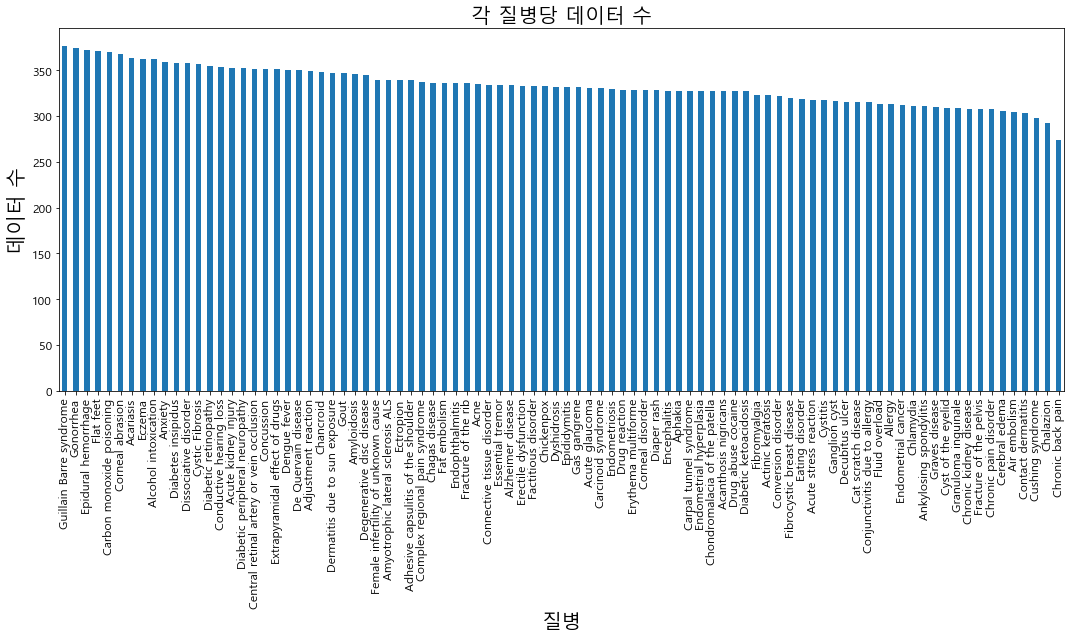

In [44]:
s = disease_count  # (series 타입)

# 데이터 정렬
s_sorted = s.sort_values(ascending=False)

# 막대 그래프 그리기
plt.figure(figsize=(15, 9))
s_sorted.plot(kind='bar')
plt.title('각 질병당 데이터 수', fontsize=20)
plt.xlabel('질병', fontsize=20)
plt.ylabel('데이터 수', fontsize=20)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [45]:
df2.head()

consult_id                               disease_tag group_id  \
0        1059  Central retinal artery or vein occlusion        7   
1       19510                 Degenerative disc disease        6   
2       25630                      Diabetic retinopathy        4   
3        1467                         Chronic back pain       13   
4        5780                              Air embolism       19   

                                                                                                                                                                                                                                                                                              goal  
0                                                                                                                                                                                     {'Spots or clouds in vision': True, 'Diminished vision': True, 'Symptoms of eye': True, 'Pain in eye': True}  
1                                                                                                                                                                    {'Shoulder pain': True, 'Back pain': True, 'Low back pain': True, 'Neck pain': True, 'Hip pain': True, 'Ache all over': True}  
2                                                                                                                                                                                                                                                          {'Foreign body sensation in eye': True}  
3                                                                                                                                                                                                                                    {'Low back pain': True, 'Back pain': True, 'Side pain': True}  
4  {'Wrist pain': True, 'Pain in eye': True, 'Shoulder cramps or spasms': True, 'Facial pain': True, 'Ankle pain': True, 'Pain during pregnancy': True, 'Joint stiffness or tightness': True, 'Pain or soreness of breast': True, 'Knee lump or mass': True, 'Excessive urination at night': True}

In [46]:
df2['is_empty_goal'] = df2['goal'].apply(lambda x: len(x) == 0)   # goal 결측치 없음(false없다는걸 아는상태)
print(df2['is_empty_goal'].unique())

[False]


In [47]:
unique_consult_ids = df2['group_id'].unique()
print(unique_consult_ids)

['7' '6' '4' '13' '19' '12' '5' '14' '1']


In [48]:
# 각 증상에 대해 필터링하여 고유한 질병 리스트와 개수 출력
symptoms = true_counts_sorted.index.tolist()   # 증상 빈도수 가장 많은것부터 내림차순으로 리스트만듦 
li = []
for symptom in symptoms:
    diseases_with_symptom = df2[df2['goal'].apply(lambda x: symptom in x if isinstance(x, dict) else False)]
    li.append(len(diseases_with_symptom['disease_tag'].unique()))
    print(f"질병과 {symptom} 증상이 함께 나타나는 경우의 수: {len(diseases_with_symptom['disease_tag'].unique())}")
    print(diseases_with_symptom['disease_tag'].unique())
    print("="*50)

질병과 Skin rash 증상이 함께 나타나는 경우의 수: 15
['Dyshidrosis' 'Drug reaction' 'Eczema' 'Acariasis' 'Chickenpox'
 'Contact dermatitis' 'Diaper rash' 'Actinic keratosis'
 'Cat scratch disease' 'Dermatitis due to sun exposure' 'Allergy'
 'Erythema multiforme' 'Acne' 'Cyst of the eyelid'
 'Connective tissue disorder']
질병과 Pain in eye 증상이 함께 나타나는 경우의 수: 18
['Central retinal artery or vein occlusion' 'Air embolism'
 'Corneal disorder' 'Gas gangrene' 'Endophthalmitis'
 'Conjunctivitis due to allergy' 'Corneal abrasion' 'Diabetic retinopathy'
 'Ectropion' 'Cyst of the eyelid' 'Aphakia' 'Fat embolism' 'Chalazion'
 'Chancroid' 'Chagas disease' 'Erythema multiforme' 'Acute glaucoma'
 'Dengue fever']
질병과 Back pain 증상이 함께 나타나는 경우의 수: 13
['Degenerative disc disease' 'Chronic back pain' 'Epidural hemorrhage'
 'Chronic pain disorder' 'Cystitis' 'Concussion' 'Fibromyalgia'
 'Fracture of the rib' 'Amyotrophic lateral sclerosis ALS' 'Dyshidrosis'
 'Fracture of the pelvis' 'Ankylosing spondylitis'
 'Complex regional

질병과 Cough 증상이 함께 나타나는 경우의 수: 9
['Conversion disorder' 'Conjunctivitis due to allergy' 'Eczema'
 'Diabetes insipidus' 'Fluid overload' 'Cystic Fibrosis' 'Chickenpox'
 'Diaper rash' 'Allergy']
질병과 Shoulder pain 증상이 함께 나타나는 경우의 수: 7
['Degenerative disc disease' 'Chronic pain disorder'
 'Adhesive capsulitis of the shoulder' 'Fibromyalgia'
 'De Quervain disease' 'Fracture of the rib' 'Cushing syndrome']
질병과 Weakness 증상이 함께 나타나는 경우의 수: 7
['Acute kidney injury' 'Amyloidosis' 'Amyotrophic lateral sclerosis ALS'
 'Guillain Barre syndrome' 'Diabetic ketoacidosis' 'Conversion disorder'
 'Fluid overload']
질병과 Itchiness of eye 증상이 함께 나타나는 경우의 수: 11
['Chalazion' 'Ectropion' 'Endophthalmitis' 'Conjunctivitis due to allergy'
 'Corneal abrasion' 'Diabetic retinopathy' 'Aphakia' 'Cyst of the eyelid'
 'Corneal disorder' 'Acute glaucoma' 'Allergy']
질병과 Disturbance of memory 증상이 함께 나타나는 경우의 수: 7
['Encephalitis' 'Alzheimer disease' 'Extrapyramidal effect of drugs'
 'Factitious disorder' 'Concussion' 'Essent

질병과 Leg weakness 증상이 함께 나타나는 경우의 수: 4
['Encephalitis' 'Guillain Barre syndrome' 'Chronic back pain'
 'Amyotrophic lateral sclerosis ALS']
질병과 Delusions or hallucinations 증상이 함께 나타나는 경우의 수: 7
['Extrapyramidal effect of drugs' 'Alzheimer disease'
 'Fracture of the pelvis' 'Alcohol intoxication' 'Drug abuse cocaine'
 'Dissociative disorder' 'Adjustment reaction']
질병과 Lip swelling 증상이 함께 나타나는 경우의 수: 3
['Drug reaction' 'Factitious disorder' 'Allergy']
질병과 Insomnia 증상이 함께 나타나는 경우의 수: 5
['Adjustment reaction' 'Encephalitis' 'Acute stress reaction' 'Anxiety'
 'Eating disorder']
질병과 Joint pain 증상이 함께 나타나는 경우의 수: 6
['Connective tissue disorder' 'Chondromalacia of the patella' 'Gout'
 'Encephalitis' 'Ankylosing spondylitis' 'Degenerative disc disease']
질병과 Retention of urine 증상이 함께 나타나는 경우의 수: 5
['Acute kidney injury' 'Cystitis' 'Erectile dysfunction' 'Epididymitis'
 'Flat feet']
질병과 Symptoms of the kidneys 증상이 함께 나타나는 경우의 수: 3
['Amyloidosis' 'Chronic kidney disease' 'Acute kidney injury']
질병과 Ab

['Carcinoid syndrome' 'Diabetes insipidus' 'Granuloma inguinale'
 'Acariasis' 'Amyloidosis' 'Factitious disorder' 'Epidural hemorrhage']
질병과 Burning abdominal pain 증상이 함께 나타나는 경우의 수: 2
['Endometriosis' 'Acute stress reaction']
질병과 Nailbiting 증상이 함께 나타나는 경우의 수: 6
['Carcinoid syndrome' 'Amyloidosis' 'Diabetes insipidus'
 'Cushing syndrome' 'Granuloma inguinale' 'Factitious disorder']
질병과 Loss of sex drive 증상이 함께 나타나는 경우의 수: 4
['Female infertility of unknown cause' 'Erectile dysfunction'
 'Carcinoid syndrome' 'Granuloma inguinale']
질병과 Warts 증상이 함께 나타나는 경우의 수: 4
['Eczema' 'Acanthosis nigricans' 'Acne' 'Actinic keratosis']
질병과 Difficulty breathing 증상이 함께 나타나는 경우의 수: 1
['Fluid overload']
질병과 Mouth ulcer 증상이 함께 나타나는 경우의 수: 1
['Erythema multiforme']
질병과 Leg cramps or spasms 증상이 함께 나타나는 경우의 수: 3
['Amyotrophic lateral sclerosis ALS' 'Graves disease'
 'Fibrocystic breast disease']
질병과 Painful menstruation 증상이 함께 나타나는 경우의 수: 1
['Endometriosis']
질병과 Eyelid swelling 증상이 함께 나타나는 경우의 수: 2
['Chalazion

질병과 Chills 증상이 함께 나타나는 경우의 수: 1
['Endometriosis']
질병과 Problems during pregnancy 증상이 함께 나타나는 경우의 수: 1
['Chickenpox']
질병과 Unwanted hair 증상이 함께 나타나는 경우의 수: 2
['Acanthosis nigricans' 'Female infertility of unknown cause']
질병과 Knee weakness 증상이 함께 나타나는 경우의 수: 1
['Chondromalacia of the patella']
질병과 Apnea 증상이 함께 나타나는 경우의 수: 1
['Acanthosis nigricans']
질병과 Hand or finger stiffness or tightness 증상이 함께 나타나는 경우의 수: 1
['Carpal tunnel syndrome']
질병과 Hoarse voice 증상이 함께 나타나는 경우의 수: 2
['Conductive hearing loss' 'Essential tremor']
질병과 Polyuria 증상이 함께 나타나는 경우의 수: 1
['Diabetic ketoacidosis']
질병과 Low back weakness 증상이 함께 나타나는 경우의 수: 5
['Endometrial hyperplasia' 'Epidural hemorrhage' 'Cushing syndrome'
 'Carbon monoxide poisoning' 'Dissociative disorder']
질병과 Mass in scrotum 증상이 함께 나타나는 경우의 수: 1
['Epididymitis']
질병과 Eye deviation 증상이 함께 나타나는 경우의 수: 1
['Central retinal artery or vein occlusion']
질병과 Itchy scalp 증상이 함께 나타나는 경우의 수: 1
['Dermatitis due to sun exposure']
질병과 Swollen tongue 증상이 함께 나타나는 경우의 수: 1

In [49]:
li

[15,
 18,
 13,
 12,
 12,
 13,
 14,
 13,
 14,
 10,
 13,
 11,
 11,
 10,
 9,
 12,
 8,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 10,
 11,
 11,
 8,
 10,
 11,
 8,
 8,
 14,
 7,
 7,
 9,
 6,
 6,
 7,
 6,
 9,
 7,
 7,
 11,
 7,
 9,
 9,
 6,
 5,
 8,
 7,
 8,
 10,
 8,
 5,
 6,
 7,
 5,
 4,
 6,
 4,
 6,
 7,
 5,
 6,
 3,
 8,
 2,
 6,
 2,
 7,
 4,
 4,
 2,
 4,
 3,
 5,
 2,
 3,
 2,
 3,
 5,
 4,
 7,
 3,
 5,
 6,
 5,
 3,
 3,
 4,
 3,
 5,
 1,
 4,
 3,
 1,
 5,
 1,
 2,
 2,
 3,
 5,
 4,
 6,
 1,
 3,
 2,
 2,
 2,
 4,
 3,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 3,
 1,
 1,
 1,
 3,
 2,
 1,
 4,
 1,
 3,
 3,
 2,
 1,
 1,
 1,
 3,
 1,
 1,
 2,
 1,
 5,
 2,
 5,
 7,
 2,
 6,
 4,
 4,
 1,
 1,
 3,
 1,
 2,
 1,
 2,
 3,
 5,
 1,
 3,
 3,
 2,
 3,
 4,
 4,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 3,
 1,
 1,
 2,
 2,
 1,
 5,
 2,
 4,
 1,
 6,
 5,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 5,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,


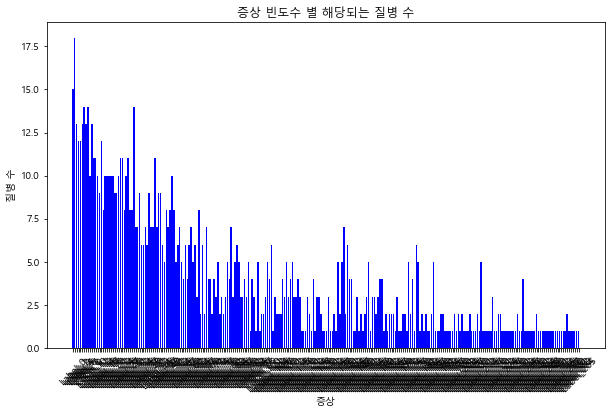

In [58]:
labels = [f'Label_{i}' for i in range(len(li))]

plt.figure(figsize=(10, 6))
plt.bar(labels, li, color='blue')
plt.xlabel('증상')
plt.ylabel('질병 수')
plt.title('증상 빈도수 별 해당되는 질병 수')
plt.xticks(rotation=45)
plt.show()

빈도수가 높은 증상일 수록 관련된 질병 수도 많다.

In [51]:
# 'Skin rash'증상이 포함된 질병은 어떤 것들이 있을까 (가장 빈도수가 높은 증상)
# 'Diminished vision'이 포함된 질병들 출력

diseases_with_skin_rash = df[df['goal'].apply(lambda x: 'Skin rash' in x)]
#' '.join(diseases)
print(diseases_with_skin_rash['disease_tag'].unique())
print(len(diseases_with_skin_rash['disease_tag'].unique()))

skin_rash_diseases = diseases_with_skin_rash['disease_tag'].unique().tolist()

['Dyshidrosis' 'Drug reaction' 'Eczema' 'Acariasis' 'Chickenpox'
 'Contact dermatitis' 'Diaper rash' 'Actinic keratosis'
 'Cat scratch disease' 'Dermatitis due to sun exposure' 'Allergy'
 'Erythema multiforme' 'Acne' 'Cyst of the eyelid'
 'Connective tissue disorder']
15


In [52]:
# 조건에 따른 boolean mask 생성
# 조건을 만족하는 행만 선택

for disease in skin_rash_diseases:         #(skin rash: 피부발진)
    mask = df2['disease_tag'] == disease
    filtered_df = df2[mask]
    print(filtered_df['group_id'].unique())

['12']
['19']
['12']
['1']
['1']
['12']
['12']
['12']
['1']
['12']
['19']
['12']
['12']
['7']
['13']


In [53]:
# group1의 증상들 뽑아내기

mask = df2['group_id'] == '19'
group2 = df2[mask]              # 데이터프레임

# 'goal' 열의 딕셔너리를 풀어서 새로운 데이터프레임 생성
group2_df = group2['goal'].apply(pd.Series)

# 각 열에서 True의 개수 세기
true_counts_by_column = group2_df.apply(lambda x: x.sum(), axis=0)

# 내림차순으로 정렬하여 출력
true_counts_sorted = true_counts_by_column.sort_values(ascending=False)

pd.set_option('display.max_rows', None)
print(len(true_counts_sorted))
print(true_counts_sorted)

73
Pain in eye                         908
Headache                            677
Dizziness                           663
Facial pain                         649
Back pain                           631
Excessive urination at night        593
Pain or soreness of breast          591
Joint stiffness or tightness        589
Shoulder cramps or spasms           586
Excessive anger                     580
Pain during pregnancy               579
Fatigue                             575
Wrist pain                          575
Ankle pain                          572
Knee lump or mass                   571
Skin rash                           491
Nausea                              462
Allergic reaction                   376
Side pain                           366
Depressive or psychotic symptoms    358
Vomiting                            352
Hip pain                            317
Itching of skin                     300
Leg pain                            295
Rib pain                            2

In [54]:
# group1의 질병들 뽑아내기

mask = df2['group_id'] == '1'
group2 = df2[mask]              # 데이터프레임

# 'goal' 열의 딕셔너리를 풀어서 새로운 데이터프레임 생성
group2_df = group2['disease_tag'].unique()
print(group2_df)


['Granuloma inguinale' 'Acariasis' 'Chickenpox' 'Chagas disease'
 'Gonorrhea' 'Chancroid' 'Gas gangrene' 'Cat scratch disease' 'Chlamydia'
 'Dengue fever']


In [55]:
# 'goal' 열을 활용하여 각 행에서 증상을 추출
symptoms = df2['goal'].apply(lambda x: list(x.keys()))

# 증상 리스트를 풀어서 Series로 변환
all_symptoms = pd.Series([item for sublist in symptoms for item in sublist])

# group_id와 증상을 기준으로 개수 세기
group_symptom_counts = all_symptoms.groupby([df2['group_id'], all_symptoms]).size().unstack(fill_value=0)
group_symptom_counts

Abnormal appearing skin  Abnormal involuntary movements  \
group_id                                                            
1                              51                              37   
12                             41                              38   
13                             40                              30   
14                             37                              35   
19                             58                              32   
4                              50                              40   
5                              46                              41   
6                              32                              38   
7                              50                              47   

          Abnormal movement of eyelid  Absence of menstruation  \
group_id                                                         
1                                  12                        3   
12                                 11                        5   
13                                 13                        2   
14                                 13                        4   
19                                 10                        1   
4                                  10                        4   
5                                   8                        1   
6                                  11                        3   
7                                  10                        5   

          Abusing alcohol  Ache all over  Acne or pimples  Allergic reaction  \
group_id                                                                       
1                      22             36               19                 16   
12                     19             35               13                 24   
13                     19             45               15                 32   
14                     19             30               22                 20   
19                     18             32               23                 34   
4                      18             43               16                 21   
5                      14             41               21                 25   
6                      20             50               27                 18   
7                      11             34               14                 28   

          Ankle pain  Ankle swelling  ...  Back cramps or spasms  \
group_id                              ...                          
1                 45               1  ...                      0   
12                37               1  ...                      0   
13                41               3  ...                      0   
14                36               1  ...                      0   
19                36               2  ...                      1   
4                 43               2  ...                      1   
5                 50               0  ...                      0   
6                 34               0  ...                      0   
7                 36               0  ...                      0   

          Bleeding from eye  Hysterical behavior  \
group_id                                           
1                         0                    0   
12                        0                    0   
13                        0                    0   
14                        0                    0   
19                        2                    1   
4                         2                    0   
5                         1                    0   
6                         2                    0   
7                         1                    1   

          Muscle cramps, contractures, or spasms  \
group_id                                           
1                                              0   
12                                             0   
13                                             0   
14                                             0   
19      

In [56]:
# 'goal' 열을 활용하여 각 행에서 증상을 추출
symptoms = df2['goal'].apply(lambda x: list(x.keys()))

# 증상 리스트를 풀어서 Series로 변환
all_symptoms = pd.Series([item for sublist in symptoms for item in sublist])

# 질병과 증상을 기준으로 개수 세기
disease_symptom_counts = all_symptoms.groupby([df2['disease_tag'], all_symptoms]).size().unstack(fill_value=0)
disease_symptom_counts

Abnormal appearing skin  \
disease_tag                                                         
Acanthosis nigricans                                            8   
Acariasis                                                       7   
Acne                                                            5   
Actinic keratosis                                               3   
Acute glaucoma                                                  7   
Acute kidney injury                                             6   
Acute stress reaction                                           3   
Adhesive capsulitis of the shoulder                             2   
Adjustment reaction                                             4   
Air embolism                                                    9   
Alcohol intoxication                                            4   
Allergy                                                         7   
Alzheimer disease                                               3   
Amyloidosis                                                     2   
Amyotrophic lateral sclerosis ALS                               4   
Ankylosing spondylitis                                          4   
Anxiety                                                         5   
Aphakia                                                         5   
Carbon monoxide poisoning                                       4   
Carcinoid syndrome                                              7   
Carpal tunnel syndrome                                          2   
Cat scratch disease                                             2   
Central retinal artery or vein occlusion                        4   
Cerebral edema                                                  3   
Chagas disease                                                  8   
Chalazion                                                       7   
Chancroid                                                       5   
Chickenpox                                                      4   
Chlamydia                                                       2   
Chondromalacia of the patella                                   5   
Chronic back pain                                               4   
Chronic kidney disease                                          2   
Chronic pain disorder                                           3   
Complex regional pain syndrome                                  4   
Concussion                                                      7   
Conductive hearing loss                                         6   
Conjunctivitis due to allergy                                   1   
Connective tissue disorder                                      4   
Contact dermatitis                                              3   
Conversion disorder                                             6   
Corneal abrasion                                                4   
Corneal disorder                                                5   
Cushing syndrome                                                8   
Cyst of the eyelid                                              6   
Cystic Fibrosis                                                 8   
Cystitis                                                        4   
De Quervain disease                                             2   
Decubitus ulcer                                                 3   
Degenerative disc disease                                       2   
Dengue fever                                                    7   
Dermatitis due to sun exposure                                  3   
Diabetes insipidus                                              3   
Diabetic ketoacidosis                                           6   
Diabetic peripheral neuropathy                                  6   
Diabetic retinopathy                                            5   
Diaper rash                                                     7   
Dissociative disorder                   

In [57]:
max_value = disease_symptom_counts.max().max()
min_value = disease_symptom_counts.min().min()
print(max_value, min_value)

16 0


In [389]:
# 무시
"""
import seaborn as sns
import matplotlib.pyplot as plt

# 그래프 스타일 설정
sns.set(style="whitegrid")

# 데이터 재구성 (group_symptom_counts를 'long-form'으로 변환)
grouped_melted = group_symptom_counts.reset_index().melt(id_vars='group_id', var_name='Symptom', value_name='Frequency')

# 각 그룹별로 캣그림 그리기
for group in grouped_melted['group_id'].unique():
    plt.figure(figsize=(20, 10))
    
    sns.catplot(x='Symptom', y='Frequency', data=grouped_melted[grouped_melted['group_id'] == group], kind='bar', height=6, aspect=3)
    
    plt.title(f'Symptom Frequency for Group {group}')
    plt.xlabel('Symptoms')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)  # X축 라벨 회전
    plt.tight_layout()  # 레이아웃 조정
    
    # 그래프 표시
    plt.show()
    """

'\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\n# 그래프 스타일 설정\nsns.set(style="whitegrid")\n\n# 데이터 재구성 (group_symptom_counts를 \'long-form\'으로 변환)\ngrouped_melted = group_symptom_counts.reset_index().melt(id_vars=\'group_id\', var_name=\'Symptom\', value_name=\'Frequency\')\n\n# 각 그룹별로 캣그림 그리기\nfor group in grouped_melted[\'group_id\'].unique():\n    plt.figure(figsize=(20, 10))\n    \n    sns.catplot(x=\'Symptom\', y=\'Frequency\', data=grouped_melted[grouped_melted[\'group_id\'] == group], kind=\'bar\', height=6, aspect=3)\n    \n    plt.title(f\'Symptom Frequency for Group {group}\')\n    plt.xlabel(\'Symptoms\')\n    plt.ylabel(\'Frequency\')\n    plt.xticks(rotation=90)  # X축 라벨 회전\n    plt.tight_layout()  # 레이아웃 조정\n    \n    # 그래프 표시\n    plt.show()\n    '

In [62]:
from itertools import combinations
from collections import Counter

# 모든 질병의 증상 조합을 추출
all_goals = df2['goal'].tolist()
all_symptoms = [list(goal.keys()) for goal in all_goals]

# 각 질병의 증상 조합을 통합
combined_symptoms = [tuple(sorted(comb)) for sublist in all_symptoms for comb in combinations(sublist, 2)]

# 증상 조합의 빈도수 계산
symptom_comb_count = Counter(combined_symptoms)

# 증상 조합의 확률 계산
total_count = len(combined_symptoms)
symptom_comb_prob = {comb: count / total_count for comb, count in symptom_comb_count.items()}

# 결과 출력
for comb, prob in symptom_comb_prob.items():
    print(f"증상 조합 {comb}의 확률: {prob:.4f}")

증상 조합 ('Diminished vision', 'Spots or clouds in vision')의 확률: 0.0018
증상 조합 ('Spots or clouds in vision', 'Symptoms of eye')의 확률: 0.0010
증상 조합 ('Pain in eye', 'Spots or clouds in vision')의 확률: 0.0012
증상 조합 ('Diminished vision', 'Symptoms of eye')의 확률: 0.0030
증상 조합 ('Diminished vision', 'Pain in eye')의 확률: 0.0047
증상 조합 ('Pain in eye', 'Symptoms of eye')의 확률: 0.0030
증상 조합 ('Back pain', 'Shoulder pain')의 확률: 0.0012
증상 조합 ('Low back pain', 'Shoulder pain')의 확률: 0.0008
증상 조합 ('Neck pain', 'Shoulder pain')의 확률: 0.0013
증상 조합 ('Hip pain', 'Shoulder pain')의 확률: 0.0005
증상 조합 ('Ache all over', 'Shoulder pain')의 확률: 0.0013
증상 조합 ('Back pain', 'Low back pain')의 확률: 0.0040
증상 조합 ('Back pain', 'Neck pain')의 확률: 0.0027
증상 조합 ('Back pain', 'Hip pain')의 확률: 0.0027
증상 조합 ('Ache all over', 'Back pain')의 확률: 0.0025
증상 조합 ('Low back pain', 'Neck pain')의 확률: 0.0020
증상 조합 ('Hip pain', 'Low back pain')의 확률: 0.0016
증상 조합 ('Ache all over', 'Low back pain')의 확률: 0.0017
증상 조합 ('Hip pain', 'Neck pain')의 확률: 0.0007
증

증상 조합 ('Depression', 'Wrist weakness')의 확률: 0.0000
증상 조합 ('Congestion in chest', 'Feeling hot and cold')의 확률: 0.0000
증상 조합 ('Cough', 'Sinus congestion')의 확률: 0.0000
증상 조합 ('Feeling hot and cold', 'Side pain')의 확률: 0.0000
증상 조합 ('Poor circulation', 'Problems with movement')의 확률: 0.0000
증상 조합 ('Chills', 'Vaginal pain')의 확률: 0.0000
증상 조합 ('Anxiety and nervousness', 'Nightmares')의 확률: 0.0000
증상 조합 ('Nightmares', 'Restlessness')의 확률: 0.0000
증상 조합 ('Bones are painful', 'Focal weakness')의 확률: 0.0000
증상 조합 ('Elbow pain', 'Eye deviation')의 확률: 0.0000
증상 조합 ('Shoulder swelling', 'Skin on arm or hand looks infected')의 확률: 0.0000
증상 조합 ('Muscle pain', 'Skin on arm or hand looks infected')의 확률: 0.0000
증상 조합 ('Muscle pain', 'Shoulder swelling')의 확률: 0.0000
증상 조합 ('Hand or finger stiffness or tightness', 'Neck pain')의 확률: 0.0001
증상 조합 ('Neck pain', 'Wrist swelling')의 확률: 0.0000
증상 조합 ('Elbow pain', 'Knee stiffness or tightness')의 확률: 0.0000
증상 조합 ('Problems with movement', 'Skin growth')의 확률: 0.0001


In [63]:
# skin rash 증상 조합 확률

# 'goal' 열에서 'Skin rash'가 포함된 행만 필터링
skin_rash_data = df2[df2['goal'].apply(lambda x: 'Skin rash' in x if isinstance(x, dict) else False)]

# 'Skin rash'와 함께 나타난 다른 증상들의 빈도수 계산
symptom_combinations = []
for goal in skin_rash_data['goal']:
    symptoms = [symptom for symptom, value in goal.items() if value]
    symptom_combinations.extend(symptoms)

# 빈도수 계산
symptom_combinations_count = pd.Series(symptom_combinations).value_counts()

# 확률 계산 (전체 증상의 수로 나누어 확률로 변환)
total_count = len(skin_rash_data)
symptom_combinations_prob = (symptom_combinations_count / total_count).sort_values(ascending=False)

print(symptom_combinations_prob)

Skin rash                                         1.000000
Itching of skin                                   0.372282
Skin lesion                                       0.281402
Abnormal appearing skin                           0.244077
Fever                                             0.184356
Allergic reaction                                 0.147355
Skin swelling                                     0.123337
Skin dryness, peeling, scaliness, or roughness    0.116196
Vomiting                                          0.115547
Acne or pimples                                   0.096073
Cough                                             0.080169
Headache                                          0.066212
Swollen eye                                       0.055177
Peripheral edema                                  0.051931
Swelling of scrotum                               0.049659
Neck swelling                                     0.043168
Skin growth                                       0.0421

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# 데이터 전처리
df_filled = df2.drop(columns=['consult_id', 'disease_tag', 'group_id'])
df_filled = df_filled.fillna(False)

# 'goal' 열 파싱하여 이진 특성으로 변환
symptoms = df_filled['goal'].apply(lambda x: list(x.keys()) if isinstance(x, dict) else [])
encoder = LabelEncoder()

for symptom in symptoms.explode().unique():
    df_filled[symptom] = df_filled['goal'].apply(lambda x: symptom in x).astype(int)

df_symptoms = df_filled.drop(columns='goal')

# K-means 클러스터링 적용
kmeans = KMeans(n_clusters=5)  # 예시로 5개의 클러스터를 설정
df_symptoms['cluster'] = kmeans.fit_predict(df_symptoms)

# 결과 출력
print(df_symptoms[['cluster']])

In [ ]:
# 조건에 따른 boolean mask 생성
mask = df['group_id'] == '1' or df['group_id'] == '4'
# 조건을 만족하는 행만 선택
filtered_df = df[mask]